# Random Predictions
In this notebook, we'll generate random predictions for a multi-class classification problem and evaluate the results using common evaluation metrics.
This is done to establish a baseline for the performance of a model. In practice, we would expect a trained model to perform better than random predictions.

Imports

In [12]:
import numpy as np
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

Load and prepare the dataset

In [13]:
image_height = 32
image_width = 150

# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((image_height, image_width)),  # Resize images to a fixed size
    transforms.ToTensor(),                           # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5],      # Normalize pixel values
                         std=[0.5, 0.5, 0.5])])

# Specify the path to your dataset
data_dir = 'fonts'

# Load the dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Calculate the size of the dataset
num_images = len(dataset)
print(f'Number of images: {num_images}')

# Get the class names
class_names = dataset.classes
print(f'Class names: {class_names}')

Number of images: 15000
Class names: ['Algerian', 'Arial', 'Baskerville', 'Calibry', 'Calligraphy', 'Cambria', 'Comic Sans MS', 'Courier', 'Elephant', 'Fascinate', 'Georgia', 'Helvetica', 'Lucida Bright', 'Nasalization', 'Times New Roman']


Evaluate the random predictions

Class names: 15
Extracting true labels from dataset
True labels: 15000
Predicted labels: 15000
Accuracy: 6.53%
Precision: 6.53
Recall: 6.53
F1 Score: 6.53
Confusion Matrix:


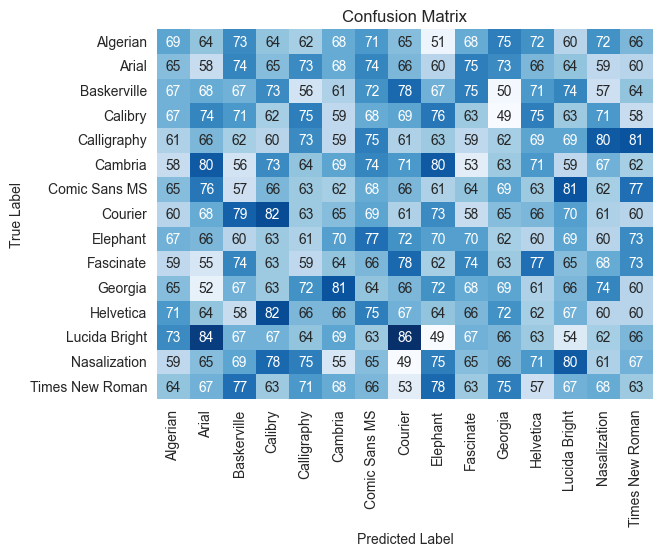

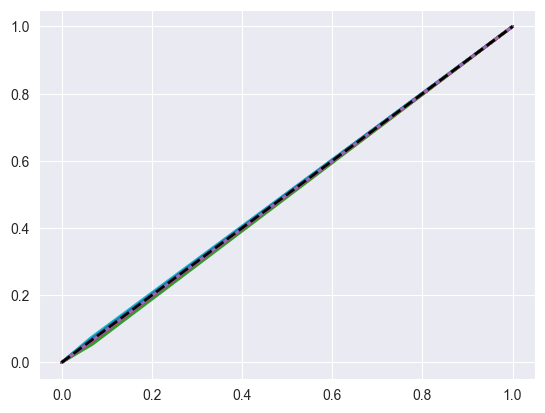

In [14]:
# Function to extract true labels from directory structure
def extract_true_labels(dataset):
    print(f'Extracting true labels from dataset')
    true_labels = []
    for _, label in dataset:
        true_labels.append(label)
    return true_labels

# Generate random labels for the dataset
print(f'Class names: {len(class_names)}')
true_labels = extract_true_labels(dataset)
print(f'True labels: {len(true_labels)}')
predicted_labels = np.random.randint(0, len(class_names), (num_images,))
print(f'Predicted labels: {len(predicted_labels)}')

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
precision = precision_score(true_labels, predicted_labels, average='micro')
print(f'Precision: {precision * 100:.2f}')
recall = recall_score(true_labels, predicted_labels, average='micro')
print(f'Recall: {recall * 100:.2f}')
f1 = f1_score(true_labels, predicted_labels, average='micro')
print(f'F1 Score: {f1 * 100:.2f}')
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(f'Confusion Matrix:')
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute the ROC curve
# Binarize the true labels
true_labels_binarized = label_binarize(true_labels, classes=range(len(class_names)))

# Binarize the predicted labels
predicted_labels_binarized = label_binarize(predicted_labels, classes=range(len(class_names)))

# Compute the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binarized[:, i], predicted_labels_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot the ROC curve
plt.figure()
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {class_names[i]} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)